# Setup

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append("/home/anukoolpurohit/Documents/Workspace/Nueromatch/NMA-DL/HandwritingBCI")

# Imports

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from torch import nn
from handwritingBCI.pathlib_extension import Path
from handwritingBCI.data.datasets import NeuroDataset

In [5]:
SEED = 42
np.random.seed(SEED)

In [6]:
DEVICE = "cpu"
if torch.cuda.is_available():
    DEVICE = "cuda"

In [7]:
print(DEVICE)

cuda


# Data

In [8]:
PATH = Path("/home/anukoolpurohit/Documents/AnukoolPurohit/Datasets/HandwritingBCI/handwriting-bci/handwritingBCIData")

# Dataset and Dataloader

In [9]:
batch_size = 32
test_size = 0.1

In [10]:
neuro_dataset = NeuroDataset.from_path(PATH)

In [11]:
train_dl, valid_dl = neuro_dataset.get_dataloaders(test_size=test_size,
                                                   batch_size=batch_size,
                                                   generator=torch.Generator().manual_seed(SEED))

# Databunch

In [12]:
from handwritingBCI.data.databunch import Databunch

In [13]:
data = Databunch.from_neuro_dataset(neuro_dataset)

In [14]:
data.train_dl

In [15]:
print(data)

train_dl length 103: Inputs of <class 'torch.Tensor'> Outputs of <class 'int'>
valid_dl length 12: Inputs of <class 'torch.Tensor'> Outputs of <class 'int'>


# Model and stuff

In [16]:
from handwritingBCI.models.simple_cnn import SimpleCNN

In [17]:
model = SimpleCNN((1, 201, 192), 64, 128, 31)

In [18]:
loss_func = nn.CrossEntropyLoss()

# Trainer

In [19]:
from handwritingBCI.training import Trainer

In [20]:
trainer = Trainer(data, model, loss_func, lr=1e-3)

In [21]:
trainer.tune(epochs=15)

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/103 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/103 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/103 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/103 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/103 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/103 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/103 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/103 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/103 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/103 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/103 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/103 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/103 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/103 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/103 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

# Visualize Results

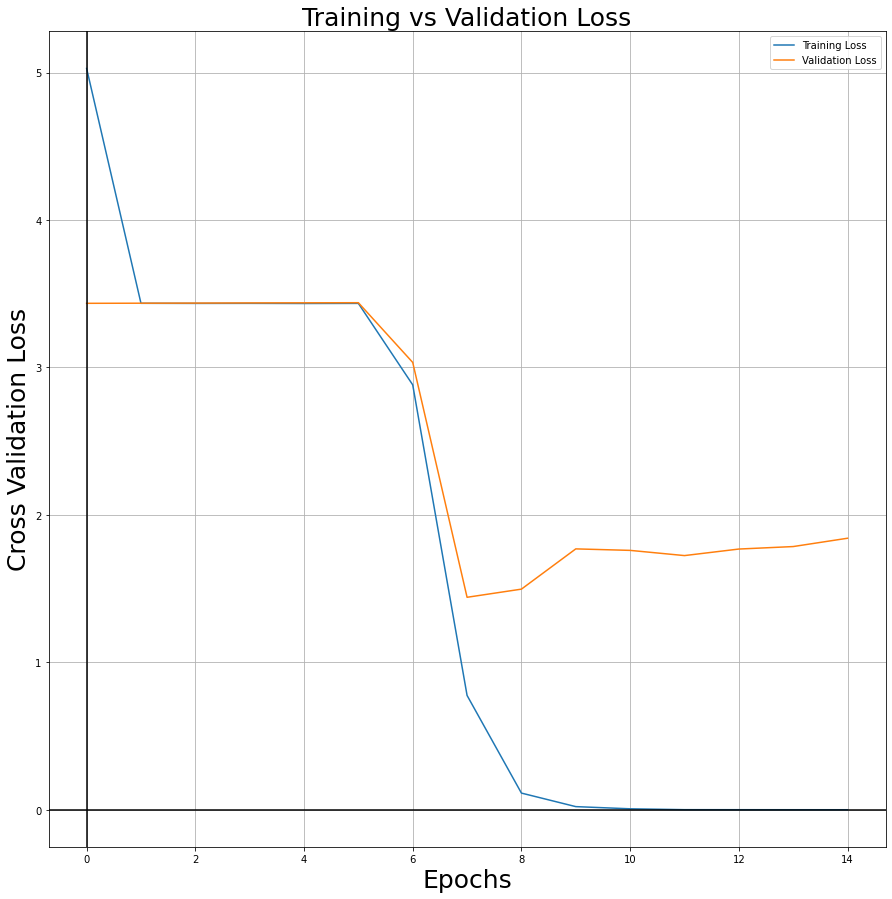

In [22]:
trainer.logger.plot("loss")

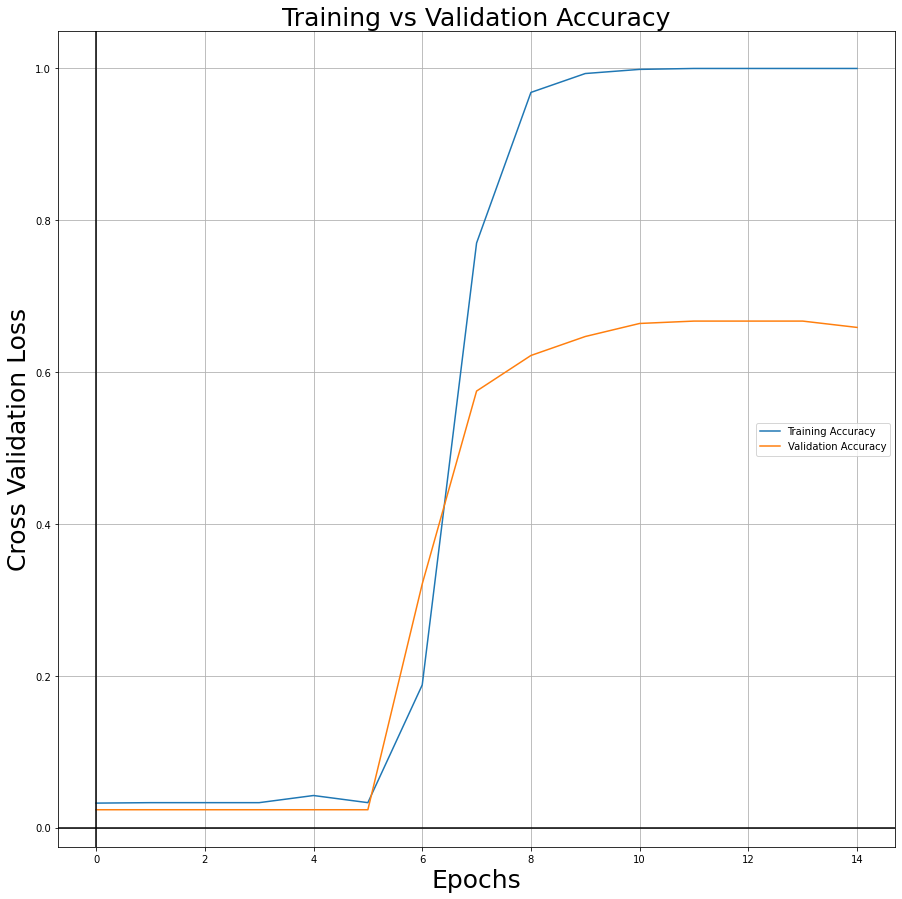

In [23]:
trainer.logger.plot("accuracy")